DAY 1(QUESTION 1)

Sample of the Iris dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


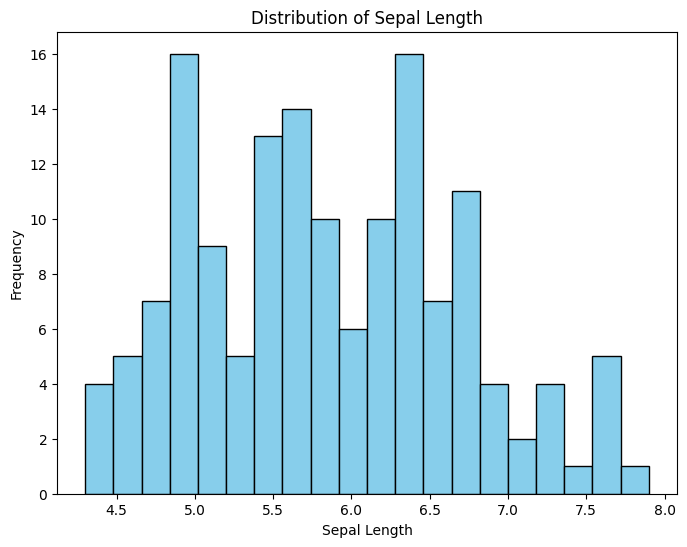

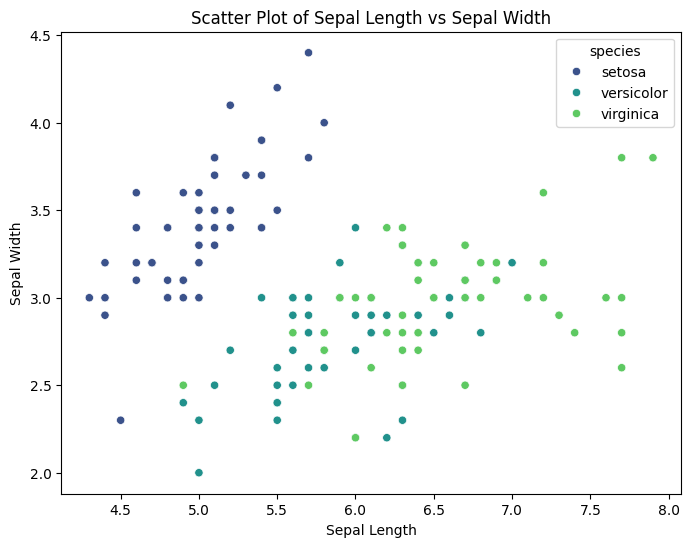

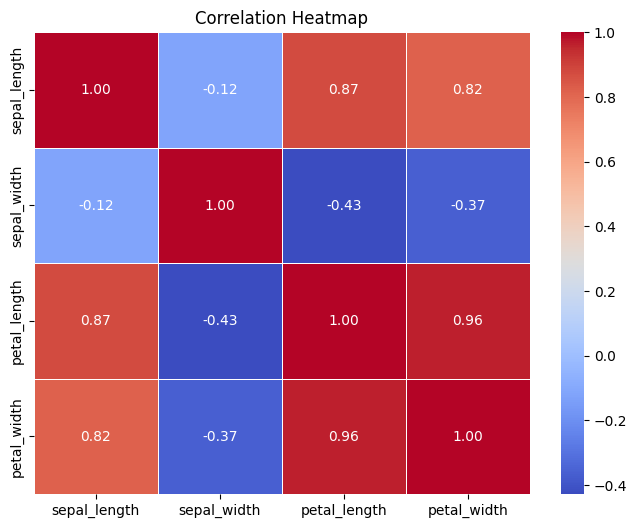

In [1]:
# LAB-1                 
# Write a Python program to demonstrate data preprocessing steps: handling missing values, encoding categorical data, and feature scaling.
# +	Load a sample dataset using pandas (e.g., Iris or a custom dataset).
# +	Plot the distribution of a feature using matplotlib.pyplot.hist().
# +	Create scatter plots to understand relationships between features using seaborn.scatterplot().
# +	Use a correlation heatmap to find the relationship between multiple features with seaborn.heatmap().


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load a sample dataset
# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')
print("Sample of the Iris dataset:")
print(iris.head())

# 2. Plot the distribution of a feature
# Plot histogram of 'sepal_length'
plt.figure(figsize=(8, 6))
plt.hist(iris['sepal_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

# 3. Create scatter plots to understand relationships between features
# Scatter plot for 'sepal_length' vs 'sepal_width'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris, palette='viridis')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# 4. Use a correlation heatmap to find relationships between multiple features
# Compute the correlation matrix
correlation_matrix = iris.drop(columns=['species']).corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Loading the Dataset:
# The Iris dataset is loaded using sns.load_dataset(). This dataset contains features like sepal length, sepal width, petal length, petal width, and the species label.
# Histogram: matplotlib.pyplot.hist() is used to visualize the distribution of the sepal_length feature.
# Scatter Plot:seaborn.scatterplot() creates a scatter plot of sepal_length vs sepal_width with points colored by species to explore feature relationships.
# Correlation Heatmap:The correlation matrix of numerical features is calculated using .corr().seaborn.heatmap() visualizes the correlation matrix with annotations.


DAY 1(QUESTION 2)

First 5 rows of the Titanic dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values after handling:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         

C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_24692\2838731314.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic[col].fillna(titanic[col].mean(), inplace=True)
C:\Users\KIIT0001\AppData\Local\Temp\ipykernel_24692\2838731314.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

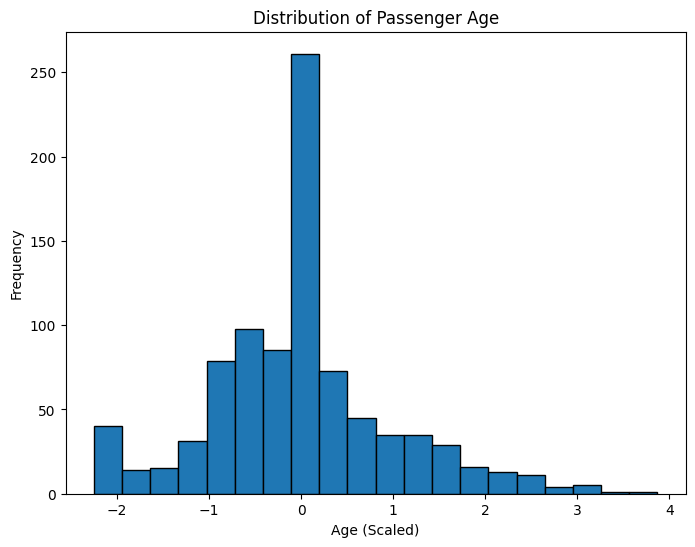

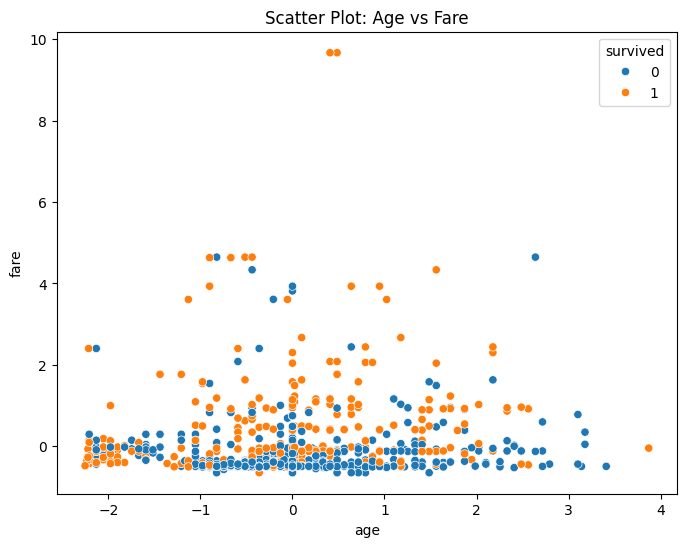

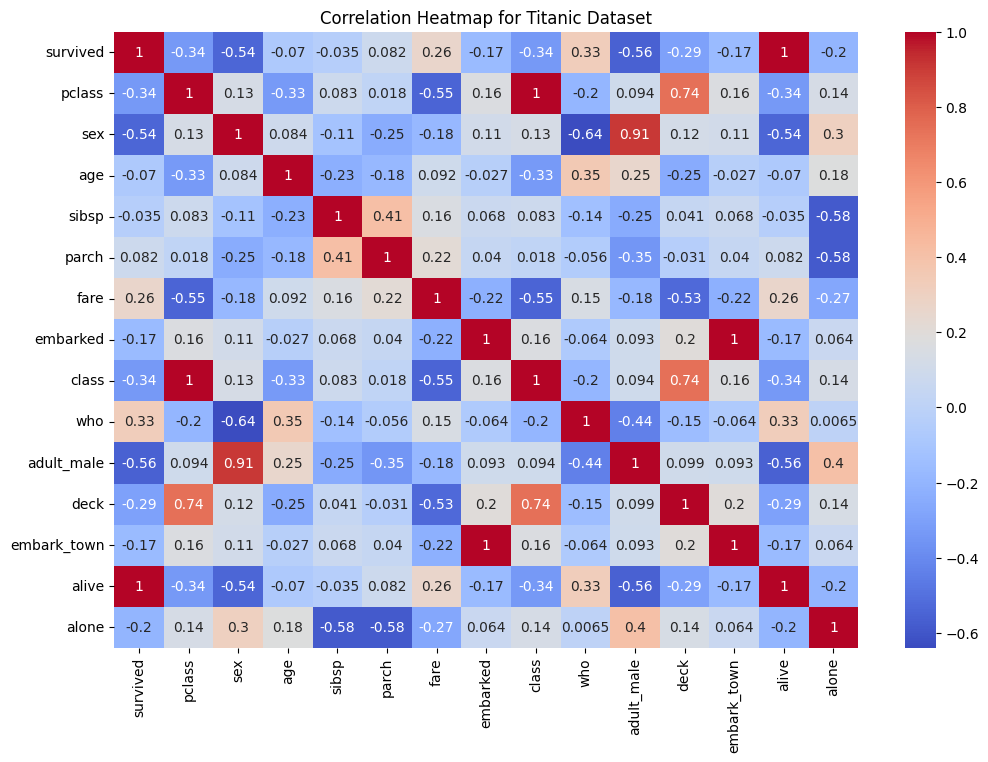

In [2]:
# LAB-1  
# Data Preprocessing and Visualization using Titanic Dataset.


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Load a sample dataset
titanic = sns.load_dataset('titanic')
print("First 5 rows of the Titanic dataset:")
print(titanic.head())

# 2. Handling Missing Values
# Fill numerical missing values with mean
for col in titanic.select_dtypes(include=['float64', 'int64']).columns:
    titanic[col].fillna(titanic[col].mean(), inplace=True)
# Fill categorical missing values with mode
for col in titanic.select_dtypes(include=['object']).columns:
    titanic[col].fillna(titanic[col].mode()[0], inplace=True)
print("\nMissing values after handling:")
print(titanic.isnull().sum())

# 3. Encoding ALL Categorical Columns
label_encoder = LabelEncoder()
cat_columns = titanic.select_dtypes(include=['object', 'category']).columns
for col in cat_columns:
    titanic[col] = label_encoder.fit_transform(titanic[col])
print("\nDataset after encoding categorical columns:")
print(titanic.head())

# 4. Feature Scaling
scaler = StandardScaler()
numeric_cols = ['age', 'fare']
titanic[numeric_cols] = scaler.fit_transform(titanic[numeric_cols])
print("\nDataset after Feature Scaling:")
print(titanic[['age', 'fare']].head())

# 5. Plot the distribution of a feature (Age)
plt.figure(figsize=(8, 6))
plt.hist(titanic['age'], bins=20, edgecolor='black')
plt.title("Distribution of Passenger Age")
plt.xlabel("Age (Scaled)")
plt.ylabel("Frequency")
plt.show()

# 6. Scatter Plot (Age vs Fare)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic)
plt.title("Scatter Plot: Age vs Fare")
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(titanic.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Titanic Dataset")
plt.show()
